Importing Data and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
# Load Data
file_path = '/content/drive/MyDrive/CODING DOJO /Projects/Project1/sales_predictions_2023.csv'
df = pd.read_csv(file_path)

Exploring and cleaning Data

In [ ]:
df.shape
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Identify duplicates


In [ ]:
df[df.duplicated(keep=False)]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Seems there are no dublicates , let's check null values

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

I am going to drop the outlet_size because I think it will irrelevant to the study

In [ ]:
df=df.drop(columns=['Outlet_Size'])


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


I will upload the item wieght with mean beacause I may use it and there aren't many null cells


In [ ]:
A=df.loc[:, 'Item_Weight'].mean()
print(A)

12.857645184135976


In [ ]:
df["Item_Weight"].fillna(A,inplace=True)

 fix inconsistencies in categorical data

In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We notice three Low Fat: Low Fat, LF, low fat so we need to converge them together

In [ ]:
df["Item_Fat_Content"].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

it's better to go back to my original, uncleaned, sales prediction dataset with the goal of preventing data leakage.( I may go back later on and try it with the data modified and test )

In [ ]:
# Load Data
file_path = '/content/drive/MyDrive/CODING DOJO /Projects/Project1/sales_predictions_2023.csv'
df = pd.read_csv(file_path)

In [ ]:
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
str_cols = df.dtypes[df.dtypes=='object'].index

In [ ]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

In [ ]:
df["Item_Fat_Content"].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

In [ ]:
df.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.0,8523.0,8523.0,8523.0,8523.0
mean,13.0,0.0,141.0,1998.0,2181.0
std,5.0,0.0,62.0,8.0,1706.0
min,5.0,0.0,31.0,1985.0,33.0
25%,9.0,0.0,94.0,1987.0,834.0
50%,13.0,0.0,143.0,1999.0,1794.0
75%,17.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


In [ ]:
df['Item_Outlet_Sales'].value_counts().sort_values(ascending=True)

2778.3834     1
51.9324       1
862.2110      1
1132.5258     1
3315.6840     1
             ..
1278.3360    14
1845.5976    15
703.0848     15
1342.2528    16
958.7520     17
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [ ]:
df=df.drop(columns=['Outlet_Size','Outlet_Identifier','Item_Identifier'])

Defining X and y

In [ ]:
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


Making a Preprocessing transformer



In [ ]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

In [ ]:
# Creating a tuple for handling categorical data
impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(drop="first",handle_unknown='ignore',sparse=False)
cat_processor=make_pipeline(impute_cat,encoder)
cat_tuple = (cat_processor,cat_selector)


In [ ]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [ ]:
# Creating a tuple for numerical categorical data
scaler = StandardScaler()
impute_num= SimpleImputer(strategy="mean")
num_processor=make_pipeline(scaler,impute_num)
num_tuple= (num_processor,num_selector)

In [ ]:
 #Combine the pipelines in a ColumnTransformer with the appropriate column selectors
cat_transformer= make_column_transformer(cat_tuple, verbose_feature_names_out=False)
transformer = make_column_transformer(num_tuple, cat_tuple, verbose_feature_names_out=False)

In [ ]:
transformer.fit(X_train)
feature_names = transformer.get_feature_names_out()
feature_names

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
X_train_df = pd.DataFrame(transformer.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.743119,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7510,0.505876,-1.291052,0.603369,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5828,-0.119583,1.813319,0.244541,0.136187,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.063163,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4810,1.390145,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_df = pd.DataFrame(transformer.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.300984,-0.776646,-0.998816,-1.293807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2957,-1.072869,0.100317,-1.585194,-0.102145,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.344119,-0.482994,-1.595784,0.136187,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Fitting a Linear Regression Model

In [ ]:
## Make and fit model
linreg_pipe = LinearRegression()
linreg_pipe.fit(X_train_df,y_train)

LinearRegression()

Predicttion

In [ ]:
sales_pred_train = linreg_pipe.predict(X_train_df)
sales_pred_test = linreg_pipe.predict(X_test_df)

Function to Evaluate Model

In [ ]:
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f}')

Linear Regression Model

In [ ]:
# find MAE, MSE, RMSE and R2 on the reg model for both the train and test data
print('Train Evaluation')

eval_model(y_train, sales_pred_train)

print('\n Test Evaluation')

eval_model(y_test,sales_pred_test)

r2 = r2_score(y_test,sales_pred_test)

Train Evaluation
MAE: 847.53 
 MSE: 1,300,346.48 
 RMSE: 1,140.33 
 R2: 0.56

 Test Evaluation
MAE: 805.29 
 MSE: 1,197,636.84 
 RMSE: 1,094.37 
 R2: 0.57


In [ ]:
linreg_pipe.coef_

array([-8.26505534e+00, -2.17204287e+01,  9.84061928e+02,  7.83157930e+00,
        6.70546388e+01, -3.68489969e+01, -2.93942735e+01,  4.71106950e+01,
        2.59327710e+01, -1.06227160e+02, -1.88640636e+00,  4.37261477e+01,
        9.83268698e+00,  2.64125567e+01,  3.47966015e+00, -1.07893196e+01,
       -3.14095669e+01,  3.16907867e+02, -1.98726681e+01, -4.23849796e+01,
        4.81852537e+01, -3.85364265e+00,  1.67513027e+01,  1.95713671e+03,
        1.61992090e+03,  3.34882139e+03])

In [ ]:
coeffs = pd.Series(linreg_pipe.coef_, index= feature_names)
coeffs['intercept'] = linreg_pipe.intercept_
coeffs

Item_Weight                          -8.265055
Item_Visibility                     -21.720429
Item_MRP                            984.061928
Outlet_Establishment_Year             7.831579
Item_Fat_Content_Regular             67.054639
Item_Fat_Content_reg                -36.848997
Item_Type_Breads                    -29.394273
Item_Type_Breakfast                  47.110695
Item_Type_Canned                     25.932771
Item_Type_Dairy                    -106.227160
Item_Type_Frozen Foods               -1.886406
Item_Type_Fruits and Vegetables      43.726148
Item_Type_Hard Drinks                 9.832687
Item_Type_Health and Hygiene         26.412557
Item_Type_Household                   3.479660
Item_Type_Meat                      -10.789320
Item_Type_Others                    -31.409567
Item_Type_Seafood                   316.907867
Item_Type_Snack Foods               -19.872668
Item_Type_Soft Drinks               -42.384980
Item_Type_Starchy Foods              48.185254
Outlet_Locati

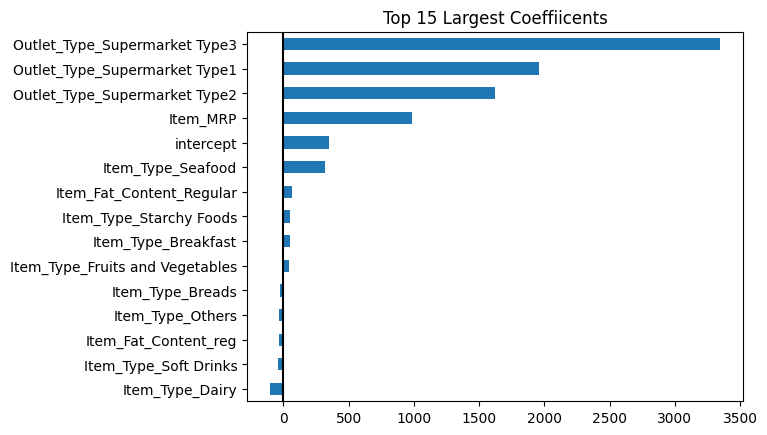

In [ ]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

Fitting a Decision Tree Regressor Model

In [ ]:
## Make and fit model
dec_tree_pipe = make_pipeline(transformer,DecisionTreeRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
sales_train = dec_tree_pipe.predict(X_train)
sales_test = dec_tree_pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree Regressor Model evaluation

In [ ]:
print('Train Evaluation')

eval_model(y_train, sales_train)

print('\n Test Evaluation')

eval_model(y_test,sales_test)

Tune Depth for Decision Tree Regressor Model

In [ ]:
#create a range of max_depth values
depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  ## Make and fit model
  dec_tree_pipe = make_pipeline(transformer,DecisionTreeRegressor(random_state = 42))
  dec_tree_pipe.fit(X_train, y_train)

  ## Get predictions for training and test data
  sales_train = dec_tree_pipe.predict(X_train)
  sales_test = dec_tree_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, sales_train)
  test_r2score = r2_score(y_test, sales_test)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [ ]:
scores

Best Depth for Decision Tree Model

In [ ]:
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [ ]:
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

Reevaluating Decision Tree Regressor Model

In [ ]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42, max_depth=best_depth)))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
sales_train = dec_tree_pipe.predict(X_train)
sales_test = dec_tree_pipe.predict(X_test)

In [ ]:
print('Train Evaluation')

eval_model(y_train, sales_pred_train)

print('\n Test Evaluation')

eval_model(y_test,sales_pred_test)

**Tuned (Max Depth) Decision Tree Model**

Tuning the max depth on the decision
tree model improved the results for the
One of the drawbacks to tuning your model is that it may perform more poorly on the training set. However, it usually will perfom better on the testing set.


Fitting a Random Forest Regressor Model

In [ ]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
sales_train = dec_tree_pipe.predict(X_train)
sales_test = dec_tree_pipe.predict(X_test)

In [ ]:
print('Train Evaluation')

eval_model(y_train, sales_pred_train)

print('\n Test Evaluation')

eval_model(y_test,sales_pred_test)

Creating a Loop to Tune n_estimators for Random Forest Regressor Model

In [ ]:
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 3000, 4000, 5000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  ## Make and fit model
  dec_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42,n_estimators=n))
  dec_tree_pipe.fit(X_train, y_train)

  ## Get predictions for training and test data
  sales_train = dec_tree_pipe.predict(X_train)
  sales_test = dec_tree_pipe.predict(X_test)

  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

Best n_estimators for Random Forest Model

In [ ]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

Reevaluating Random Forest Regressor Model

In [ ]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42,n_estimators=))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
sales_train = dec_tree_pipe.predict(X_train)
sales_test = dec_tree_pipe.predict(X_test)

In [ ]:
print('Train Evaluation')

eval_model(y_train, sales_pred_train)

print('\n Test Evaluation')

eval_model(y_test,sales_pred_test)

Overall, the best model is definitely the tuned Random Forest Regressor Model. There was still some bias in the model, but by far it outperformed the linear regression model.